# NanoAODplus_analyzer

In [1]:
import time

from coffea import hist
from coffea.analysis_objects import JaggedCandidateArray
import coffea.processor as processor
from awkward import JaggedArray
import numpy as np
from pprint import pprint

from nanoAODplus_processor.GenParticleProcessor import GenParticleProcessor

import matplotlib.pyplot as plt
import mplhep as hep
plt.style.use(hep.style.CMS)

In [3]:
tstart = time.time()

files = {'UpsilonDzero': ['sandbox/data/UpsilonDzero_GP.root']}

output = processor.run_uproot_job(files,
                                  treename='Events',
                                  processor_instance=GenParticleProcessor(),
                                  #executor=processor.iterative_executor,
                                  #executor_args={'flatten': True},
                                  executor=processor.futures_executor,
                                  #executor_args={'workers': 6, 'flatten': True},
                                  executor_args={'workers': 8, 'flatten': True},
                                  chunksize=100000,
                                 )

elapsed = time.time() - tstart
print(output)

FileNotFoundError: [Errno 2] No such file or directory: 'sandbox/data/UpsilonDzero_GP.root'

(0.0, 40.0)

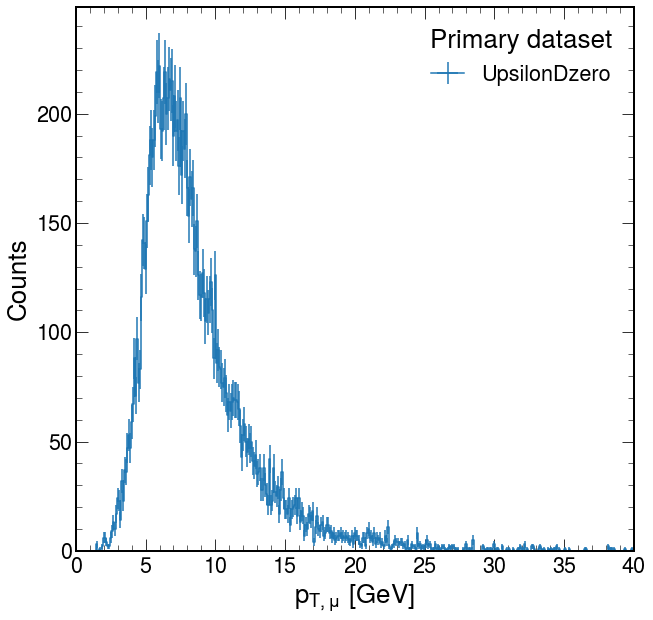

In [8]:
ax = hist.plot1d(output['Muon_lead_pt'], overlay='dataset')
ax.set_xlim(0,40)

(0.0, 20.0)

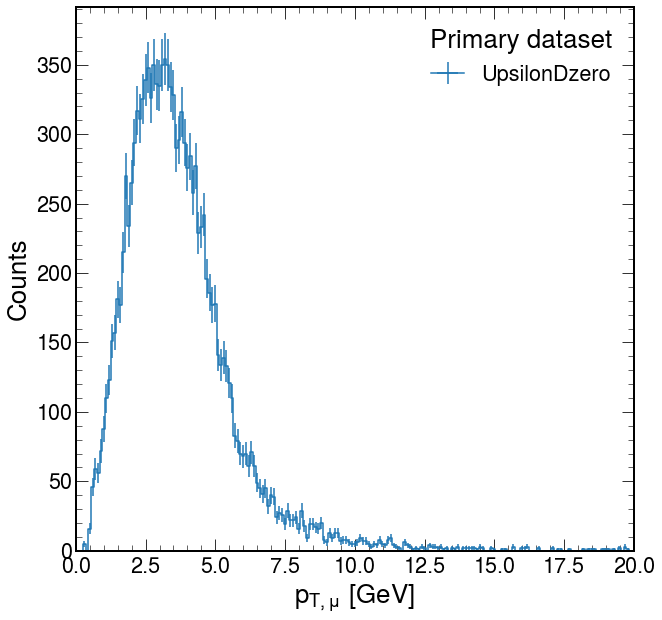

In [9]:
ax = hist.plot1d(output['Muon_trail_pt'], overlay='dataset')
ax.set_xlim(0,20)

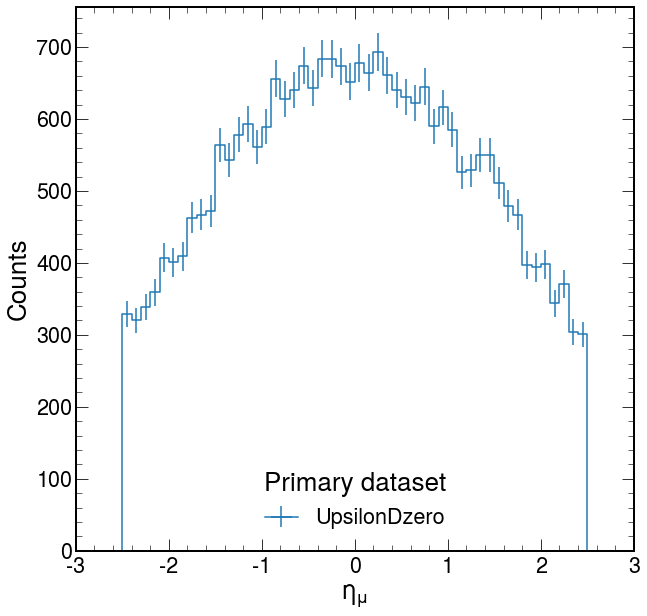

In [5]:
ax = hist.plot1d(output['Muon_eta'], overlay='dataset')

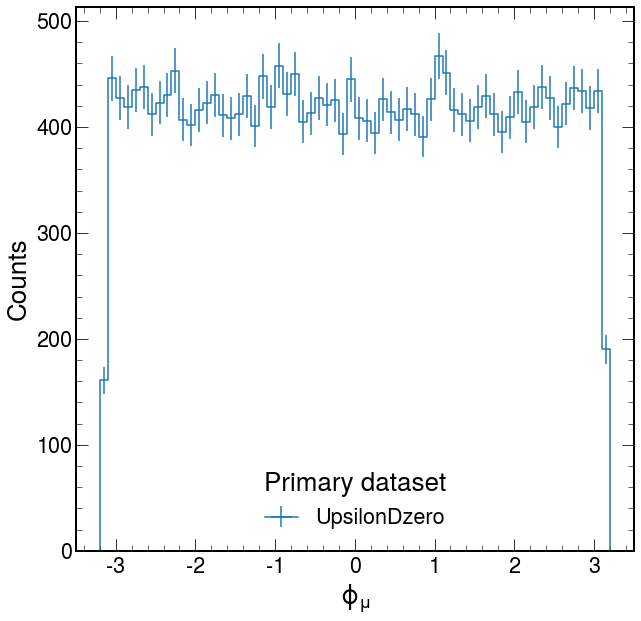

In [6]:
ax = hist.plot1d(output['Muon_phi'], overlay='dataset')

(0.0, 1000.0)

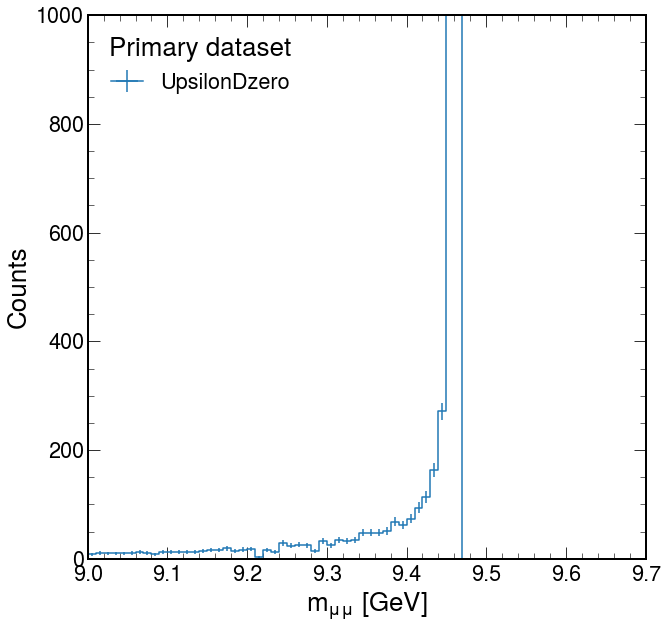

In [15]:
ax = hist.plot1d(output['Dimuon_mass'], overlay='dataset')
ax.set_xlim(9,9.7)
ax.set_ylim(0,1000)

(0.0, 15.0)

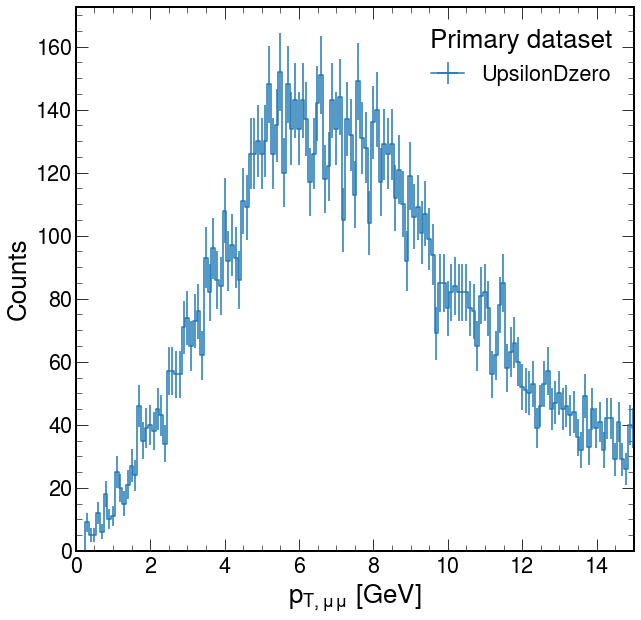

In [11]:
ax = hist.plot1d(output['Dimuon_pt'], overlay='dataset')
ax.set_xlim(0,15)

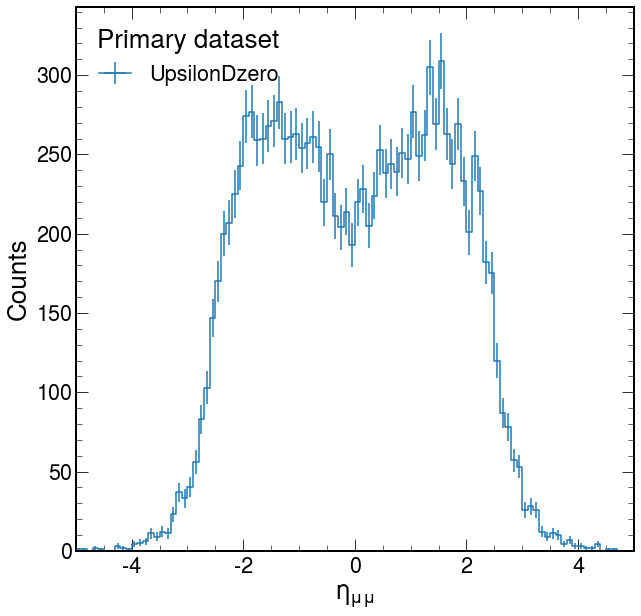

In [12]:
ax= hist.plot1d(output['Dimuon_eta'], overlay='dataset')

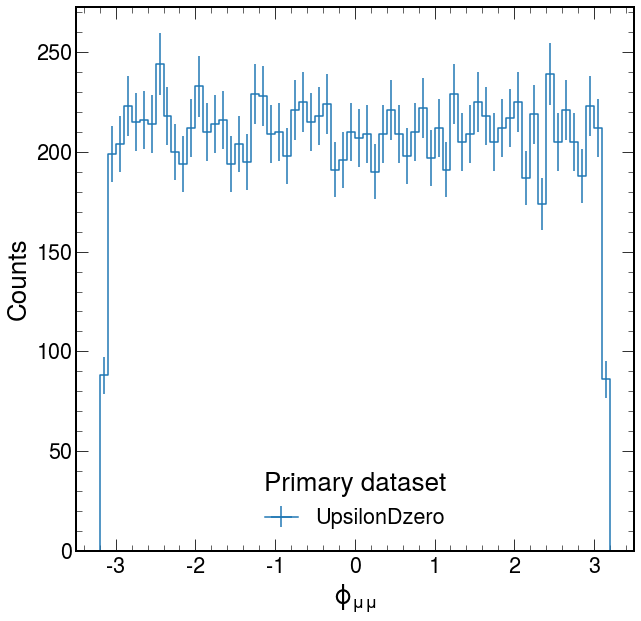

In [13]:
ax= hist.plot1d(output['Dimuon_phi'], overlay='dataset')

In [ ]:
ax= hist.plot1d(output['D0_mass'], overlay='dataset')
ax.set_xlim(1.0,2.5)

In [ ]:
ax= hist.plot1d(output['D0_pt'], overlay='dataset')
ax.set_xlim(0,7.5)

In [ ]:
ax= hist.plot1d(output['D0_eta'], overlay='dataset')

In [ ]:
ax= hist.plot1d(output['D0_phi'], overlay='dataset')